<h1 id="heading"  align="center"> Data wrangling and visualization</h1>
<h2 align="center"> Data analysis of service request (311) calls from New York City</h2>
<h3 align="center"> Surya Lamichhane</h3>

We consider the dataset related to New York City service request call (311) in 2015. We will utilize the data wrangling techniques to understand the pattern in the data and visualize the major types of complaints and average time taken to close the issues of the dataset. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Get the home directory
import os
#print(os.path.expanduser('~'))

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Dataset

**Load the dataset**

In [7]:
# the data is about the residential homes in Ames, Iowa
NYC_311_data = pd.read_csv(r".\Project_Two_Dataset\311_Service_Requests_from_2010_to_Present.csv")

**Data information**

In [8]:
NYC_311_data.info

<bound method DataFrame.info of         Unique Key            Created Date             Closed Date Agency  \
0         32310363  12/31/2015 11:59:45 PM  01/01/2016 12:55:15 AM   NYPD   
1         32309934  12/31/2015 11:59:44 PM  01/01/2016 01:26:57 AM   NYPD   
2         32309159  12/31/2015 11:59:29 PM  01/01/2016 04:51:03 AM   NYPD   
3         32305098  12/31/2015 11:57:46 PM  01/01/2016 07:43:13 AM   NYPD   
4         32306529  12/31/2015 11:56:58 PM  01/01/2016 03:24:42 AM   NYPD   
...            ...                     ...                     ...    ...   
364553    29609918  01/01/2015 12:04:44 AM  01/01/2015 10:22:31 AM   NYPD   
364554    29608392  01/01/2015 12:04:28 AM  01/01/2015 02:25:02 AM   NYPD   
364555    29607589  01/01/2015 12:01:30 AM  01/01/2015 12:20:33 AM   NYPD   
364556    29610889  01/01/2015 12:01:29 AM  01/01/2015 02:42:22 AM   NYPD   
364557    29611816  01/01/2015 12:00:50 AM  01/01/2015 02:47:50 AM   NYPD   

                            Agency Name    

**i.	Identify the shape of the dataset**

In [9]:
NYC_311_data.shape

(364558, 53)

**ii.	Identify variables with null values**

In [10]:
missing_values_info = NYC_311_data.isnull()

In [11]:
null_status = np.sum(missing_values_info, axis = 0)

In [12]:
misssing_records = null_status[null_status > 0] 
types = NYC_311_data.dtypes[null_status > 0] 
percentage = misssing_records/ NYC_311_data.shape[0] * 100

In [13]:
missing_values_df = pd.concat({'missing records': misssing_records, 'variable type':types, 'percentage': 
                               np.round(percentage, 2)}, axis = 1).sort_values(by = 'percentage', ascending = False)
print(missing_values_df)

                                missing records variable type  percentage
Ferry Direction                          364557        object      100.00
Ferry Terminal Name                      364556        object      100.00
Taxi Company Borough                     364558       float64      100.00
Taxi Pick Up Location                    364558       float64      100.00
Garage Lot Name                          364558       float64      100.00
Vehicle Type                             364558       float64      100.00
School or Citywide Complaint             364558       float64      100.00
Bridge Highway Segment                   364296        object       99.93
Road Ramp                                364296        object       99.93
Bridge Highway Direction                 364261        object       99.92
Bridge Highway Name                      364261        object       99.92
Landmark                                 364183        object       99.90
Intersection Street 2                 

**Missing value treatment**

Remove the columns which have more than $80\%$ of missing values including irrelevant varaibles.

In [14]:
above_80_prc_var = missing_values_df["percentage"][missing_values_df["percentage"] > 80].keys()
above_80_prc_var

Index(['Ferry Direction', 'Ferry Terminal Name', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Garage Lot Name', 'Vehicle Type',
       'School or Citywide Complaint', 'Bridge Highway Segment', 'Road Ramp',
       'Bridge Highway Direction', 'Bridge Highway Name', 'Landmark',
       'Intersection Street 2', 'Intersection Street 1'],
      dtype='object')

In [15]:
final_df = NYC_311_data.drop(above_80_prc_var, axis = 1)
final_df.keys()

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [16]:
final_df[['Created Date', 'Closed Date','Resolution Action Updated Date', 'Due Date']]

,Created Date,Closed Date,Resolution Action Updated Date,Due Date
0,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,01/01/2016 12:55:15 AM,01/01/2016 07:59:45 AM
1,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,01/01/2016 01:26:57 AM,01/01/2016 07:59:44 AM
2,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,01/01/2016 04:51:03 AM,01/01/2016 07:59:29 AM
3,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,01/01/2016 07:43:13 AM,01/01/2016 07:57:46 AM
4,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,01/01/2016 03:24:42 AM,01/01/2016 07:56:58 AM
...,...,...,...,...
364553,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,01/01/2015 10:22:31 AM,01/01/2015 08:04:44 AM
364554,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,01/01/2015 02:25:02 AM,01/01/2015 08:04:28 AM
364555,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,01/01/2015 12:20:33 AM,01/01/2015 08:01:30 AM
364556,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,01/01/2015 02:42:22 AM,01/01/2015 08:01:29 AM


**Conversion of date-time variable to datetime object**

In [17]:
#Now that I have the relevant columns, I will convert the columns with date and time information 
#from strings into datetime objects. 
final_df['Created_Date'] = pd.to_datetime(final_df['Created Date'], format = "%m/%d/%Y %I:%M:%S %p", errors = "coerce")
final_df['Closed_Date'] = pd.to_datetime(final_df['Closed Date'], format = "%m/%d/%Y %I:%M:%S %p")
final_df['Due_Date'] = pd.to_datetime(final_df['Due Date'], format = "%m/%d/%Y %I:%M:%S %p", errors = "coerce")
final_df['Resolution_Action_Updated_Date'] = pd.to_datetime(final_df['Resolution Action Updated Date'],format = "%m/%d/%Y %I:%M:%S %p", errors = "coerce")

In [18]:
dt2 = final_df['Closed_Date']
dt1 = final_df['Created_Date']
dt2.dtype, dt1.dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [19]:
final_df = final_df.drop(['Created Date', 'Closed Date','Resolution Action Updated Date', 'Due Date'], axis = 1)
final_df.dtypes

Unique Key                                 int64
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Address Type                              object
City                                      object
Facility Type                             object
Status                                    object
Resolution Description                    object
Community Board                           object
Borough                                   object
X Coordinate (State Plane)               float64
Y Coordinate (State Plane)               float64
Park Facility Name  

In [20]:
missing_values_info = final_df.isnull()

In [21]:
null_status = np.sum(missing_values_info, axis = 0)

In [22]:
misssing_records = null_status[null_status > 0] 
types = final_df.dtypes[null_status > 0] 
percentage = misssing_records/ final_df.shape[0] * 100

In [23]:
missing_values_df = pd.concat({'missing records': misssing_records, 'variable type':types, 'percentage': 
                               np.round(percentage, 2)}, axis = 1).sort_values(by = 'percentage', ascending = False)
print(missing_values_df)

                                missing records   variable type  percentage
Cross Street 2                            57805          object       15.86
Cross Street 1                            57188          object       15.69
Incident Address                          51699          object       14.18
Street Name                               51699          object       14.18
Descriptor                                 6501          object        1.78
Y Coordinate (State Plane)                 4030         float64        1.11
Location                                   4030          object        1.11
Longitude                                  4030         float64        1.11
Latitude                                   4030         float64        1.11
X Coordinate (State Plane)                 4030         float64        1.11
Address Type                               3252          object        0.89
City                                       2997          object        0.82
Incident Zip

**Replace the missing values of the categorical columns as "Unknown"**

In [24]:
cat_var = final_df.select_dtypes(exclude=[np.number]).keys()
cat_var
#categorical_data["FireplaceQu"] = categorical_data["FireplaceQu"].replace(np.nan, "None")

Index(['Agency', 'Agency Name', 'Complaint Type', 'Descriptor',
       'Location Type', 'Incident Address', 'Street Name', 'Cross Street 1',
       'Cross Street 2', 'Address Type', 'City', 'Facility Type', 'Status',
       'Resolution Description', 'Community Board', 'Borough',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'Location', 'Created_Date', 'Closed_Date', 'Due_Date',
       'Resolution_Action_Updated_Date'],
      dtype='object')

In [25]:
final_df[cat_var] = final_df[cat_var].replace(np.nan, "Unknown")

In [26]:
final_df.Created_Date.isnull().sum()

0

**EDA**

**i.	Frequency plot for city-wise complaints**

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
temp = final_df['City'].value_counts().head(20)
nm = temp.keys()
df = pd.DataFrame({ "number_of_complain":temp})
df

,number_of_complain
BROOKLYN,118862
NEW YORK,77312
BRONX,49171
STATEN ISLAND,15340
JAMAICA,8932
ASTORIA,7991
FLUSHING,7487
RIDGEWOOD,6392
CORONA,5383
WOODSIDE,4357


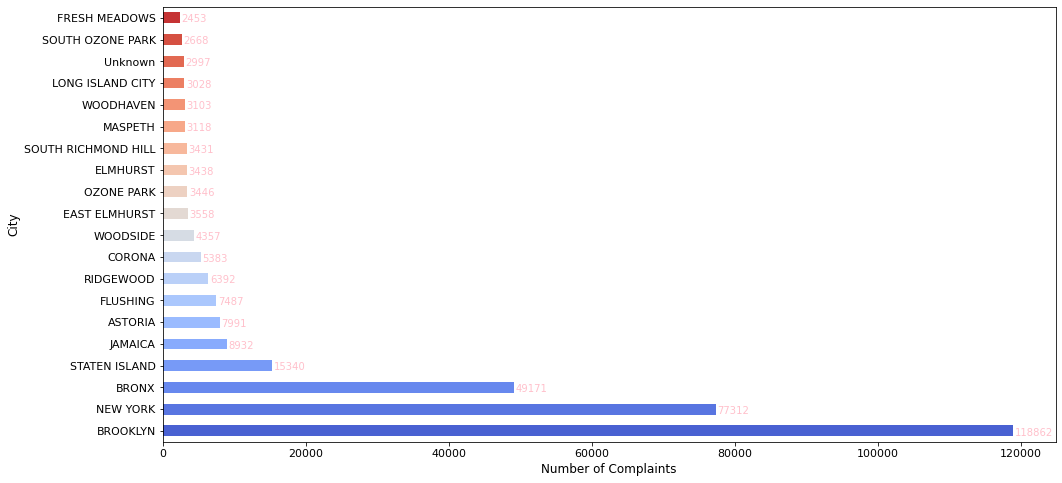

In [29]:
# find the name of the less common complaints and rename all corresponding rows
df_complaints = temp
#‘bar’ : vertical bar plot
#‘barh’ : horizontal bar plot
df_complaints.plot(kind = 'barh', figsize = (16, 8), fontsize = 11, color = sns.color_palette('coolwarm', len(df_complaints)))
plt.ylabel('City', fontsize = 12)
plt.xlabel('Number of Complaints', fontsize = 12)
# Includes the number of incidents  by top 20 cities
for index, value in enumerate(df_complaints):        
    label = str(int(value)) 
    plt.annotate(label, xy = (value + 200, index - 0.2 ), color = 'pink')

<AxesSubplot:xlabel='count', ylabel='City'>

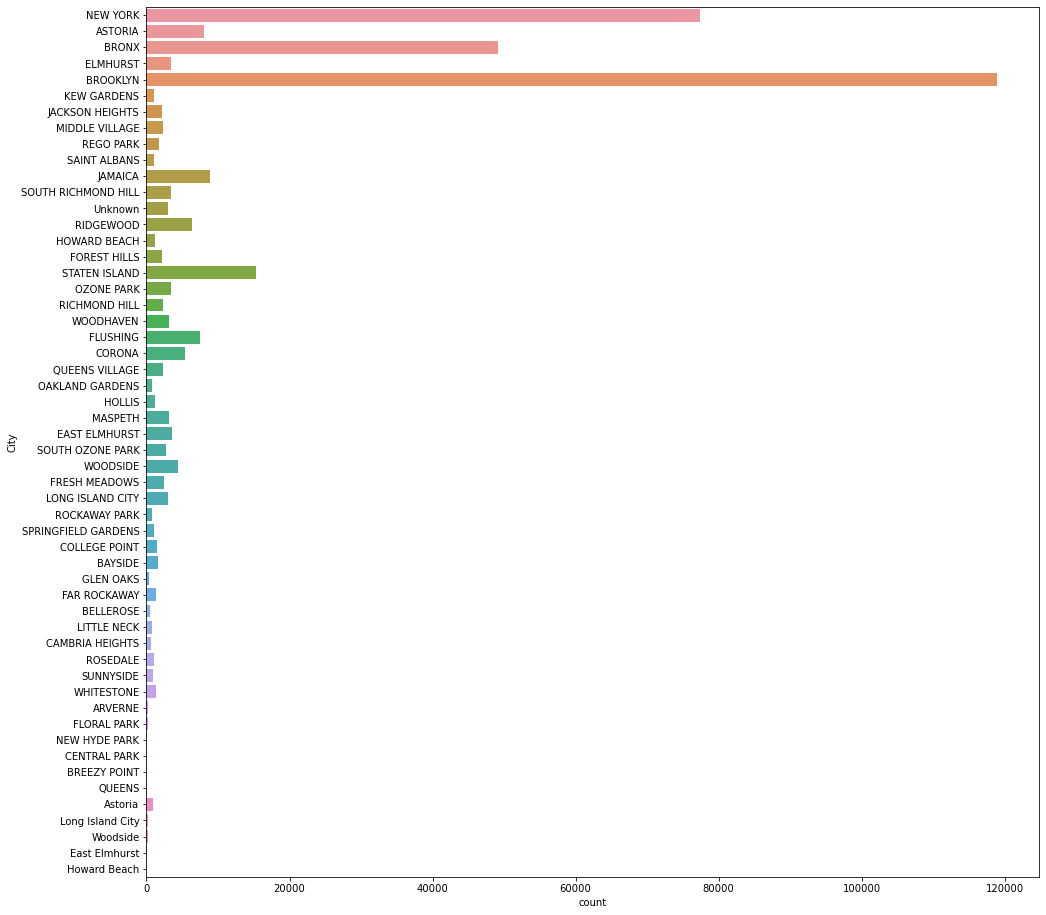

In [30]:
%matplotlib inline
plt.rcParams["figure.figsize"] = 16, 16
sns.countplot(y = "City", data = final_df)

**Varaible with unique values**

In [31]:
#dist_values = customer_service311data.apply(set).apply(len)
var = final_df.keys()
unique_lst = []
var_lst = []
for v in var:
    uniqueValues = final_df[v].nunique()
    unique_lst.append(uniqueValues)
    var_lst.append(v)
dat  = {"variables": var_lst, "uniqe_values":  unique_lst} 
unique_table  = pd.DataFrame(dat).sort_values('uniqe_values', ascending = False)
unique_table

,variables,uniqe_values
0,Unique Key,364558
35,Created_Date,362018
37,Due_Date,362016
38,Resolution_Action_Updated_Date,340834
36,Closed_Date,339838
34,Location,146752
32,Latitude,146740
33,Longitude,146473
7,Incident Address,126373
19,Y Coordinate (State Plane),79924


There are 54 cities in the dataset



In [32]:
final_df['Created_year'] = pd.Series(pd.DatetimeIndex(final_df['Created_Date']).year)
final_df['Created_month'] = pd.Series(pd.DatetimeIndex(final_df['Created_Date']).month)
yearly_grouped_data = pd.pivot_table(final_df,\
                                         index=['Complaint Type'],\
                                         columns=["Created_year"], \
                                         values=["Unique Key"],\
                                         aggfunc= lambda values: values.count(),fill_value=0)

In [33]:
complaints_by_type_year = pd.pivot_table(final_df,\
                                         index=["Complaint Type"],\
                                         columns=["Created_year"], \
                                         values=["Unique Key"],\
                                         aggfunc= lambda values: values.count(),fill_value=0)
complaints_by_type_year['Unique Key'].sort_values(by = 2015, ascending = False).head(10)

Created_year,2015
Complaint Type,
Blocked Driveway,100881
Illegal Parking,92679
Noise - Street/Sidewalk,51692
Noise - Commercial,44109
Derelict Vehicle,21661
Noise - Vehicle,19352
Animal Abuse,10541
Traffic,5198
Homeless Encampment,4879


In [34]:
complaints_by_type_month = pd.pivot_table(final_df,\
                                         index=["Complaint Type"],\
                                         columns=["Created_month"], \
                                         values=["Unique Key"],\
                                         aggfunc= lambda values: values.count(),fill_value=0)

In [35]:
month_total = final_df.groupby('Created_month').agg('count')['Unique Key']

In [36]:
monthly_percentage_complain_type = complaints_by_type_month["Unique Key"].sort_values(by=1, ascending=False)/month_total*100
monthly_percentage_complain_type.head(10).round(2)

Created_month,1,2,3,4,5,6,7,8,9,10,11,12
Complaint Type,,,,,,,,,,,,
Blocked Driveway,35.92,39.99,35.48,25.15,22.24,24.30,21.96,22.21,24.57,28.94,31.40,31.26
Illegal Parking,26.08,27.18,28.21,25.34,22.24,24.36,23.46,23.18,24.76,26.14,27.98,28.81
Noise - Commercial,15.08,13.07,12.17,15.47,13.51,11.00,8.40,8.71,10.69,13.41,13.41,13.03
Derelict Vehicle,6.16,5.03,7.32,6.12,5.41,5.87,6.05,5.78,5.94,5.74,5.83,6.21
Animal Abuse,5.30,4.93,2.93,2.74,2.32,2.70,2.99,2.64,2.49,2.52,2.28,2.59
Noise - Street/Sidewalk,4.76,3.59,5.99,13.39,19.64,17.78,21.93,22.35,18.32,11.92,9.36,8.70
Noise - Vehicle,3.53,3.20,4.06,5.89,6.92,6.16,6.36,6.21,5.67,5.12,4.20,4.19
Traffic,0.88,1.27,1.19,1.51,1.64,1.87,1.49,1.11,1.38,1.67,1.40,1.35
Homeless Encampment,0.76,0.53,0.89,1.10,1.39,1.35,1.77,1.86,1.80,1.46,1.22,1.15


**Complain type group by city**

In [37]:
complaints_by_type_city = pd.pivot_table(final_df,\
                                         index=["City"],\
                                         columns=["Complaint Type"], \
                                         values=["Unique Key"],\
                                         aggfunc= lambda values: values.count(),fill_value=0)

In [38]:
temp = final_df['Complaint Type'].value_counts()
nm = temp.keys()
df = pd.DataFrame({ "number_of_complain":temp})
df.head(10)

,number_of_complain
Blocked Driveway,100881
Illegal Parking,92679
Noise - Street/Sidewalk,51692
Noise - Commercial,44109
Derelict Vehicle,21661
Noise - Vehicle,19352
Animal Abuse,10541
Traffic,5198
Homeless Encampment,4879
Vending,4192


In [39]:
city_complain_type = complaints_by_type_city["Unique Key"].sort_values(by = 'Blocked Driveway', ascending=False)


In [40]:
city_complain_type.head(10)

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
BROOKLYN,0,3191,0,124,36447,6259,79,291,0,60,...,389,1575,13984,5966,49,58,0,1258,155,575
BRONX,0,1971,0,22,17063,2403,66,206,0,15,...,90,548,9146,3556,20,18,0,427,54,433
FLUSHING,0,191,0,3,3641,532,2,47,0,6,...,5,61,241,147,2,1,0,59,12,37
JAMAICA,0,317,0,3,3621,1133,9,40,0,3,...,15,38,365,337,3,8,0,632,37,24
CORONA,0,104,0,0,3597,72,6,34,0,4,...,3,24,243,110,1,1,0,14,7,65
ASTORIA,0,170,0,16,3436,426,5,43,0,4,...,21,64,409,236,2,3,0,60,10,57
STATEN ISLAND,0,786,0,10,2845,2184,25,188,0,6,...,18,67,888,424,13,517,0,229,19,25
NEW YORK,0,1941,0,254,2707,695,81,321,0,25,...,222,1244,22252,6295,206,49,4,1770,264,2639
RIDGEWOOD,0,154,0,3,2162,507,3,10,0,3,...,2,28,448,249,0,1,0,50,9,9


In [41]:
New_york_data = final_df.loc[final_df["City"] == "NEW YORK"]
temp = New_york_data['Complaint Type'].value_counts().head(20)
nm = temp.keys()
df = pd.DataFrame({"complain_type": nm,  "number_of_complain":temp}).head(10)

[Text(0.5, 1.0, 'Top 10 complain type of New York')]

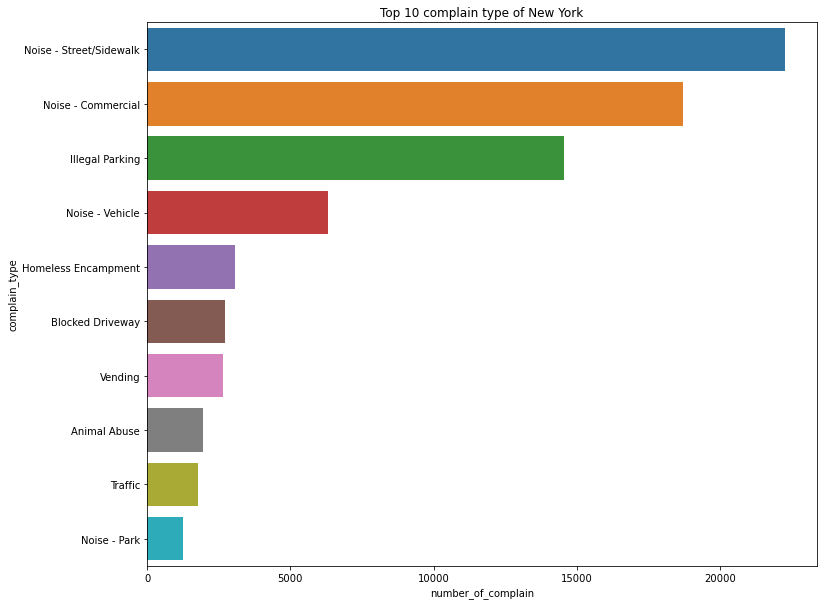

In [42]:
plt.rcParams["figure.figsize"] = 12, 10
sns.barplot(y = 'complain_type', x ='number_of_complain' , data = df).set(title='Top 10 complain type of New York')

**Scatter and hexbin plots for complaint concentration across Brooklyn**

In [43]:
Brooklyn_data = final_df.loc[final_df["City"] == "BROOKLYN"]
temp = Brooklyn_data['Complaint Type'].value_counts().head(20)
nm = temp.keys()
df = pd.DataFrame({"complain_type": nm,  "number_of_complain":temp}).head(10)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

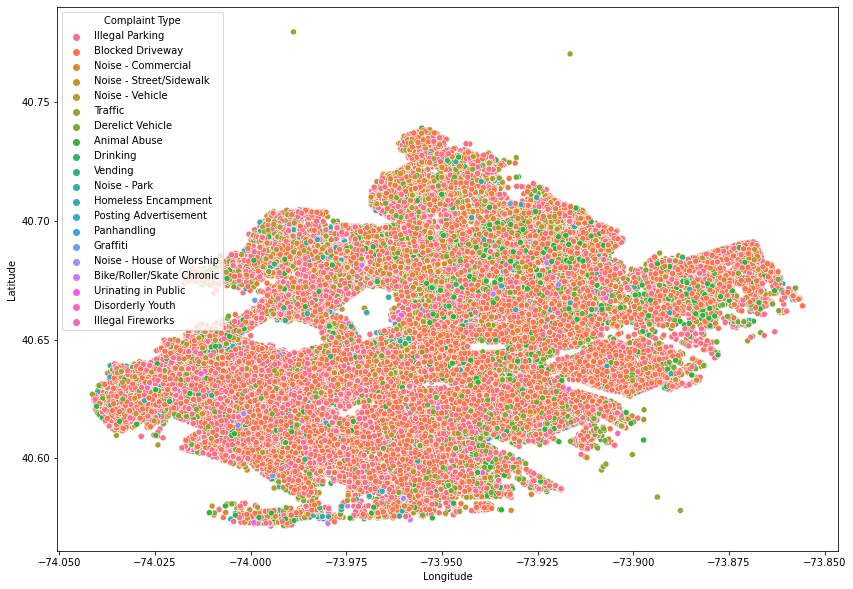

In [44]:
plt.rcParams["figure.figsize"] = 14, 10
sns.scatterplot(x='Longitude', y='Latitude', hue="Complaint Type",  data = Brooklyn_data)

(-74.05061403048781, -73.8464793432815, 40.561126853754885, 40.78979838623255)

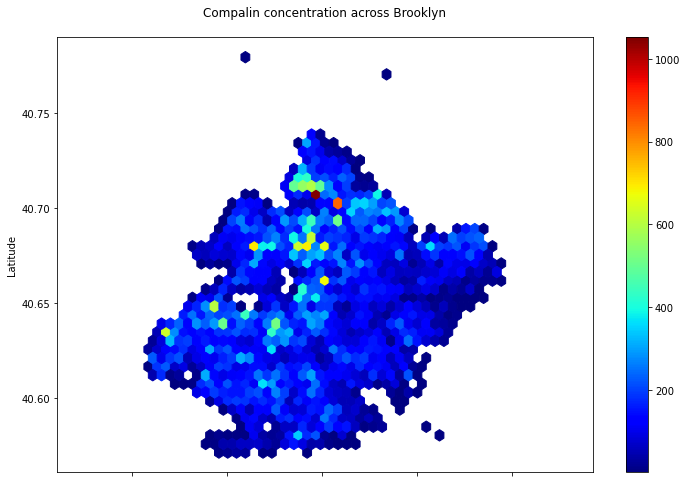

In [45]:
Brooklyn_data = final_df.loc[final_df["City"] == "BROOKLYN"]
Brooklyn_data.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Compalin concentration across Brooklyn\n', figsize=(12,8)).axis('equal')

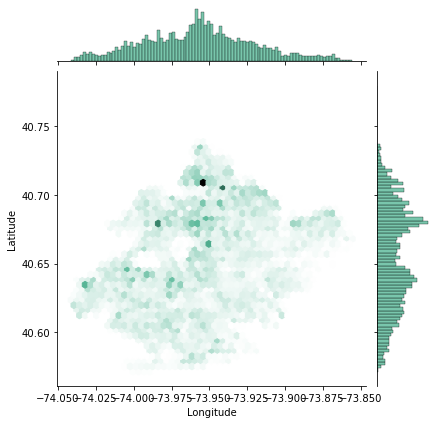

In [46]:
sns.jointplot( x='Longitude', y='Latitude',  kind="hex", color="#4CB391", data = Brooklyn_data)

**Major types of complaints**

In [47]:
temp = final_df['Complaint Type'].value_counts()
nm = temp.keys()
df = pd.DataFrame({"complain_type": nm, "number_of_complain":temp})
df.head(10)

,complain_type,number_of_complain
Blocked Driveway,Blocked Driveway,100881
Illegal Parking,Illegal Parking,92679
Noise - Street/Sidewalk,Noise - Street/Sidewalk,51692
Noise - Commercial,Noise - Commercial,44109
Derelict Vehicle,Derelict Vehicle,21661
Noise - Vehicle,Noise - Vehicle,19352
Animal Abuse,Animal Abuse,10541
Traffic,Traffic,5198
Homeless Encampment,Homeless Encampment,4879
Vending,Vending,4192


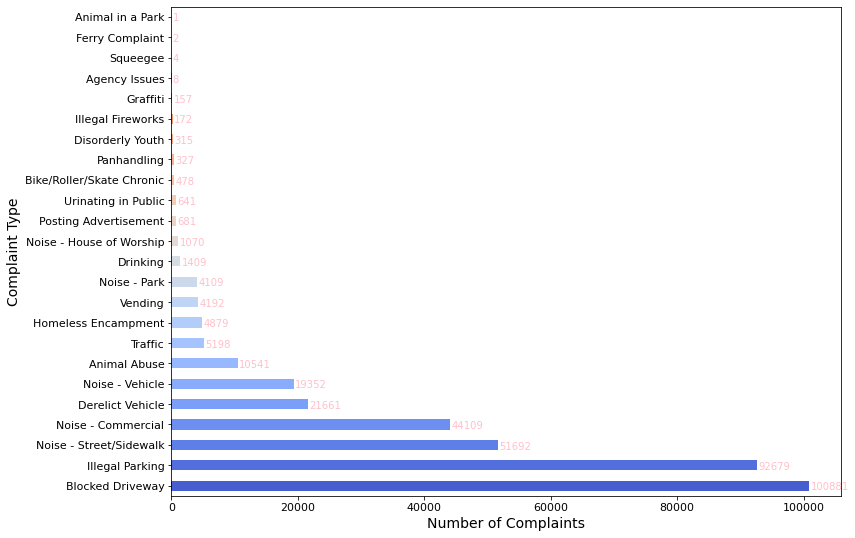

In [48]:
# find the name of the less common complaints and rename all corresponding rows
df_complaints = temp
#‘bar’ : vertical bar plot
#‘barh’ : horizontal bar plot
df_complaints.plot(kind = 'barh', figsize = (12, 9), fontsize = 11, color = sns.color_palette('coolwarm', len(df_complaints)))
plt.ylabel('Complaint Type', fontsize = 14)
plt.xlabel('Number of Complaints', fontsize = 14)
# Includes the number of incidents and the corresponding percentage for every type
for index, value in enumerate(df_complaints):        
    label = str(int(value)) 
    plt.annotate(label, xy = (value + 200, index - 0.2 ), color = 'pink')

[Text(0.5, 1.0, 'Top 20 complain type of the full dataset')]

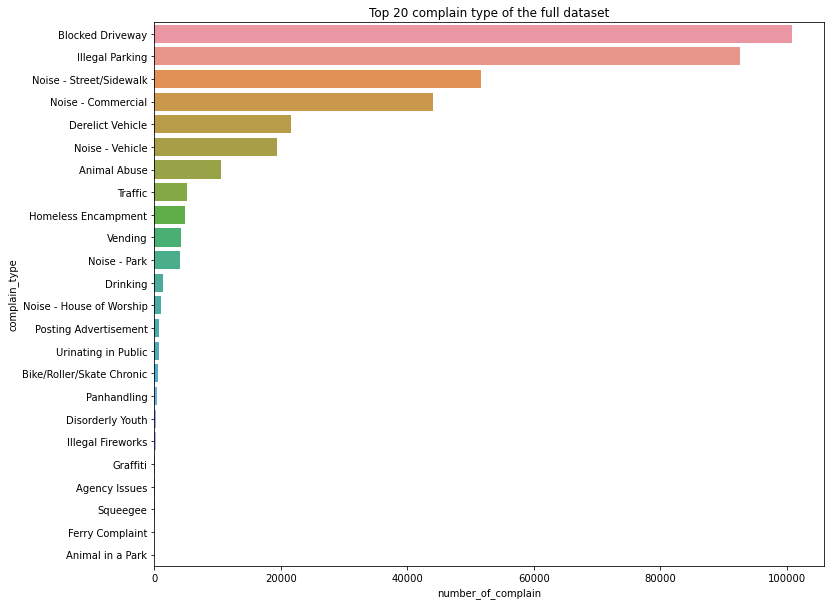

In [49]:
plt.rcParams["figure.figsize"] = 12, 10
sns.barplot(y = 'complain_type', x ='number_of_complain',
            data = df).set(title='Top 20 complain type of the full dataset')

**Visualize the major types of complaints in each city**

In [50]:
# Conclusion 1: City with maximum number of complaints was found to be Brooklyn with different types of complaints
df1=final_df.groupby(['City','Complaint Type']).size().unstack().fillna(0)

Text(0.5, 1.0, 'Number of complaints vs. City')

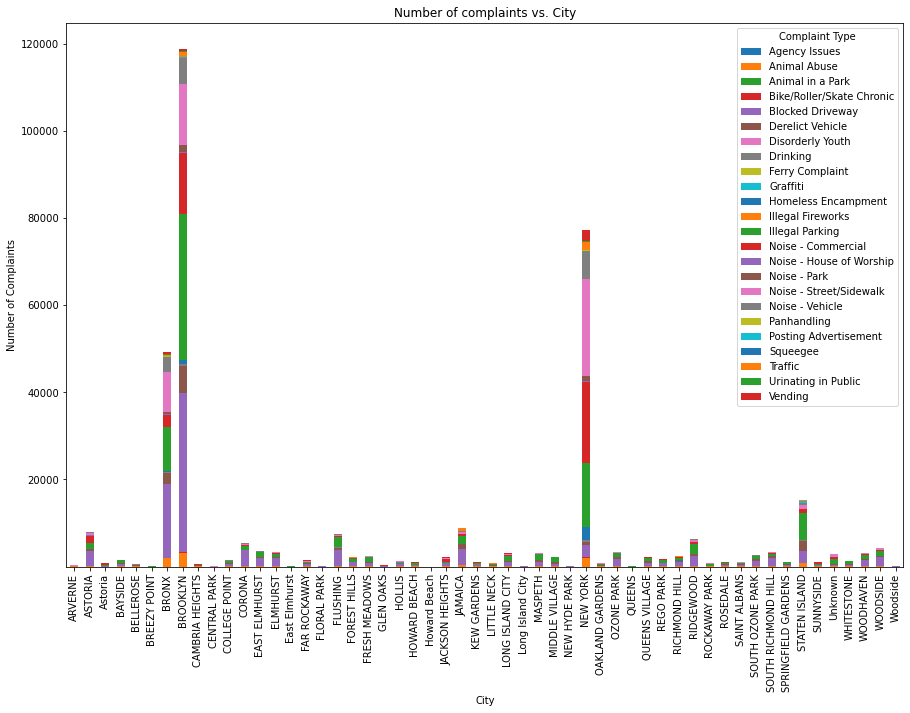

In [51]:
df1.plot.bar(figsize=(15,10), stacked=True)
plt.ylabel('Number of Complaints')
plt.title('Number of complaints vs. City')

**City-wise top complain-type plot**

In [52]:
cities = final_df["City"].unique()
for k in range(0,9):
    print(cities[k])

NEW YORK
ASTORIA
BRONX
ELMHURST
BROOKLYN
KEW GARDENS
JACKSON HEIGHTS
MIDDLE VILLAGE
REGO PARK


In [53]:
New_york_data = final_df.loc[final_df["City"] == "NEW YORK"]
temp = New_york_data['Complaint Type'].value_counts().head(20)
nm = temp.keys()
df = pd.DataFrame({"complain_type": nm,  "number_of_complain":temp}).head(10)

[Text(0.5, 1.0, 'Top 10 complain type of New York')]

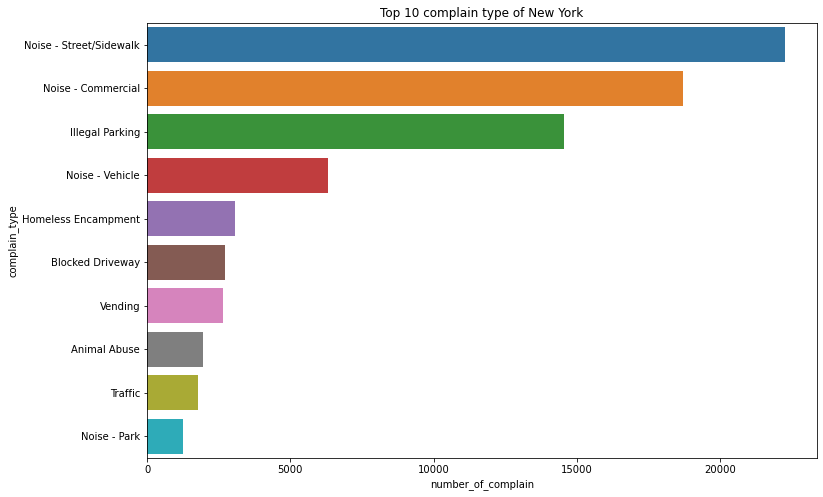

In [54]:
plt.rcParams["figure.figsize"] = 12, 8
sns.barplot(y = 'complain_type', x ='number_of_complain' , data = df).set(title='Top 10 complain type of New York')

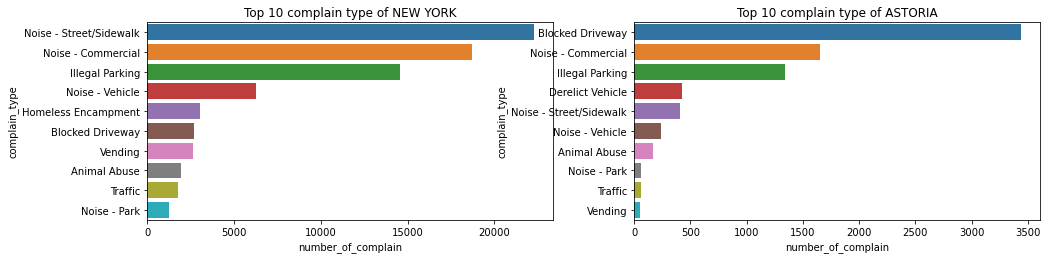

In [55]:
plt.rcParams['figure.figsize'] = (16, 8)
for k in range(0,2):
    New_york_data = final_df.loc[final_df["City"] == cities[k]]
    temp = New_york_data['Complaint Type'].value_counts().head(20)
    nm = temp.keys()
    df = pd.DataFrame({"complain_type": nm,  "number_of_complain":temp}).head(10)
    # plot k
    plt.subplot(2, 2, (k+1))
    sns.barplot(y = 'complain_type', x ='number_of_complain' , data = df).set(title='Top 10 complain type of ' + cities[k])

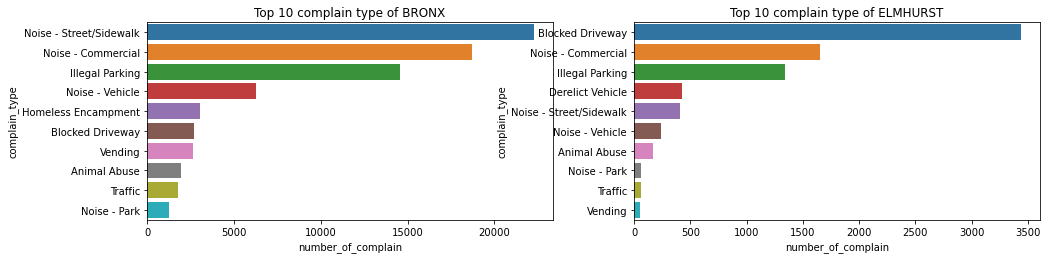

In [56]:
plt.rcParams['figure.figsize'] = (16, 8)
for k in range(0,2):
    j = 2 + k
    New_york_data = final_df.loc[final_df["City"] == cities[k]]
    temp = New_york_data['Complaint Type'].value_counts().head(20)
    nm = temp.keys()
    df = pd.DataFrame({"complain_type": nm,  "number_of_complain":temp}).head(10)
    # plot k
    plt.subplot(2, 2, (k+1))
    sns.barplot(y = 'complain_type', x ='number_of_complain' , data = df).set(title='Top 10 complain type of ' + cities[j])

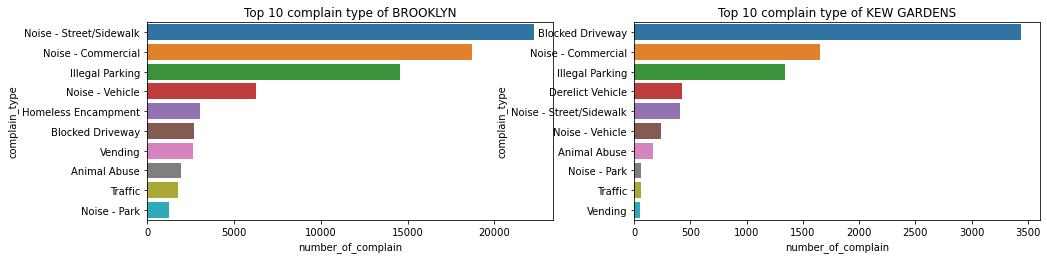

In [57]:
plt.rcParams['figure.figsize'] = (16, 8)
for k in range(0,2):
    j = 4 + k
    New_york_data = final_df.loc[final_df["City"] == cities[k]]
    temp = New_york_data['Complaint Type'].value_counts().head(20)
    nm = temp.keys()
    df = pd.DataFrame({"complain_type": nm,  "number_of_complain":temp}).head(10)
    # plot k
    plt.subplot(2, 2, (k+1))
    sns.barplot(y = 'complain_type', x ='number_of_complain' , data = df).set(title='Top 10 complain type of ' + cities[j])

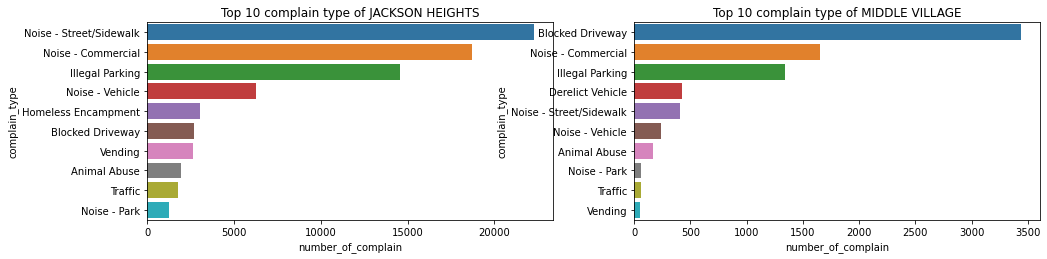

In [58]:
plt.rcParams['figure.figsize'] = (16, 8)
for k in range(0,2):
    j = 6 + k
    New_york_data = final_df.loc[final_df["City"] == cities[k]]
    temp = New_york_data['Complaint Type'].value_counts().head(20)
    nm = temp.keys()
    df = pd.DataFrame({"complain_type": nm,  "number_of_complain":temp}).head(10)
    # plot k
    plt.subplot(2, 2, (k+1))
    sns.barplot(y = 'complain_type', x ='number_of_complain' , data = df).set(title='Top 10 complain type of ' + cities[j])

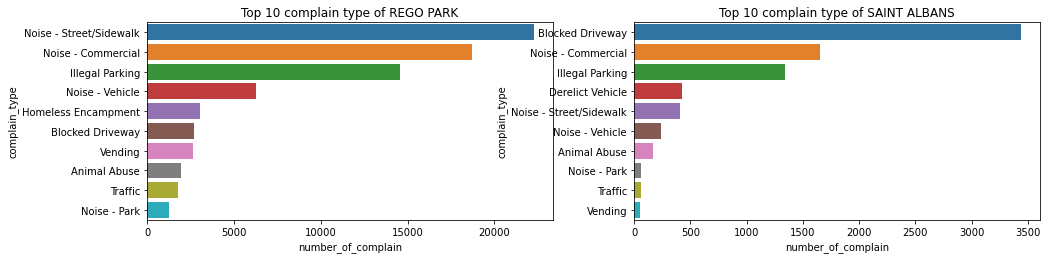

In [59]:
plt.rcParams['figure.figsize'] = (16, 8)
for k in range(0,2):
    j = 8 + k
    New_york_data = final_df.loc[final_df["City"] == cities[k]]
    temp = New_york_data['Complaint Type'].value_counts().head(20)
    nm = temp.keys()
    df = pd.DataFrame({"complain_type": nm,  "number_of_complain":temp}).head(10)
    # plot k
    plt.subplot(2, 2, (k+1))
    sns.barplot(y = 'complain_type', x ='number_of_complain' , data = df).set(title='Top 10 complain type of ' + cities[j])

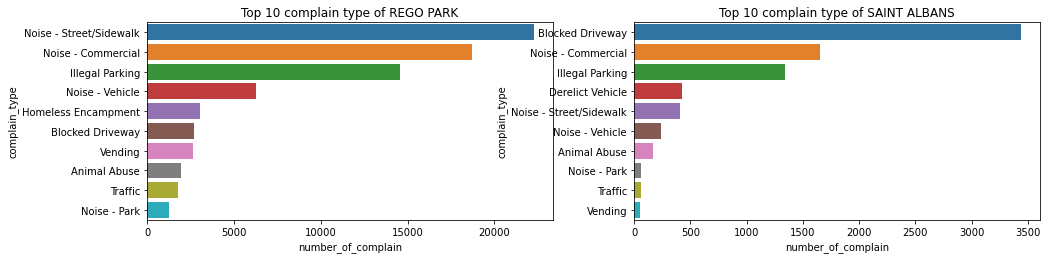

In [60]:
plt.rcParams['figure.figsize'] = (16, 8)
for k in range(0,2):
    j = 8 + k
    New_york_data = final_df.loc[final_df["City"] == cities[k]]
    temp = New_york_data['Complaint Type'].value_counts().head(20)
    nm = temp.keys()
    df = pd.DataFrame({"complain_type": nm,  "number_of_complain":temp}).head(10)
    # plot k
    plt.subplot(2, 2, (k+1))
    sns.barplot(y = 'complain_type', x ='number_of_complain' , data = df).set(title='Top 10 complain type of ' + cities[j])

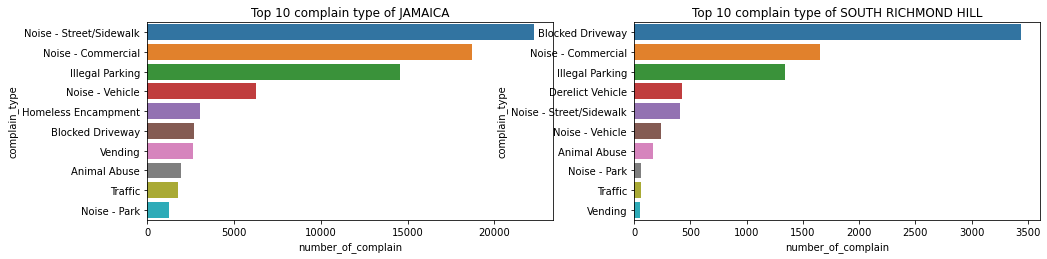

In [61]:
plt.rcParams['figure.figsize'] = (16, 8)
for k in range(0,2):
    j = 10 + k
    New_york_data = final_df.loc[final_df["City"] == cities[k]]
    temp = New_york_data['Complaint Type'].value_counts().head(20)
    nm = temp.keys()
    df = pd.DataFrame({"complain_type": nm,  "number_of_complain":temp}).head(10)
    # plot k
    plt.subplot(2, 2, (k+1))
    sns.barplot(y = 'complain_type', x ='number_of_complain' , data = df).set(title='Top 10 complain type of ' + cities[j])

**The average response time across various types of complaints**

In [62]:
delta = dt2 - dt1
final_df["response_time"] = pd.DataFrame(delta)
final_df['Closing_Time_in_mins'] = final_df['response_time']/np.timedelta64(1,'m')

**Average closing time by Boroughs**

In [63]:
#Average  Closing Time by Boroughs
time_by_Borough = final_df[['Borough', 'Closing_Time_in_mins']]
mean_time_by_Borough = time_by_Borough.groupby('Borough')['Closing_Time_in_mins'].mean().fillna(0).to_frame()
mean_time_by_Borough.sort_values(by = 'Closing_Time_in_mins', axis=0, ascending=False)

,Closing_Time_in_mins
Borough,
Unspecified,611.938084
BRONX,353.134028
QUEENS,280.686186
BROOKLYN,236.601078
STATEN ISLAND,228.017333
MANHATTAN,175.378661


Text(0.5, 1.0, 'Average Request Closing Time for Boroughs')

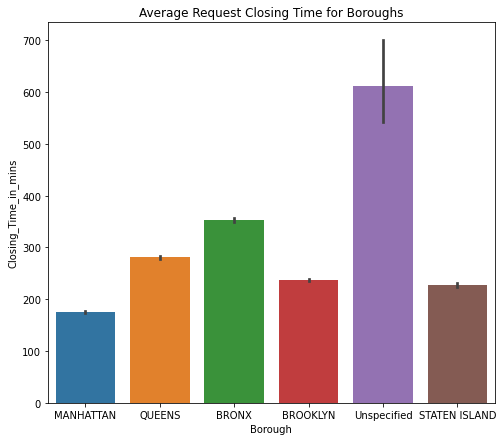

In [64]:
#Average  Closing Time by Boroughs
plt.figure(figsize=(8,7))
sns.barplot(x='Borough', y='Closing_Time_in_mins', data=final_df)
plt.title('Average Request Closing Time for Boroughs')

**Average closing time by CIties**

In [65]:
#Average  Closing Time for various Cities
time_by_City = final_df[['City', 'Closing_Time_in_mins']]
mean_time_by_City = time_by_City.groupby('City')['Closing_Time_in_mins'].mean().fillna(0).to_frame()
mean_time_by_City.sort_values(by = 'Closing_Time_in_mins', axis=0, ascending=False)

,Closing_Time_in_mins
City,
QUEENS,717.171171
FLORAL PARK,609.812160
QUEENS VILLAGE,593.920472
BELLEROSE,576.173614
ROSEDALE,569.194745
Unknown,556.662562
CAMBRIA HEIGHTS,542.883117
SPRINGFIELD GARDENS,510.113239
GLEN OAKS,501.653463


Text(0.5, 1.0, 'Average Request Closing Time for Cities')

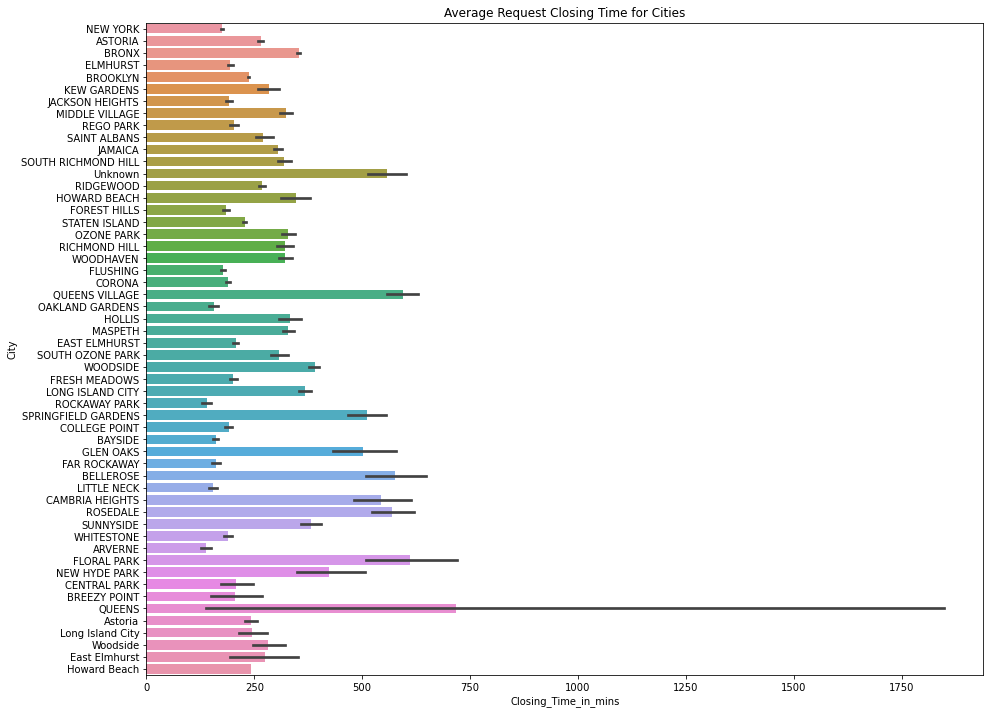

In [66]:
# Average resolving time of a compalaint for different Cities
plt.figure(figsize=(15,12))
sns.barplot( y ='City', x ='Closing_Time_in_mins', data=final_df)
plt.title('Average Request Closing Time for Cities')

**Average closing time by Complaint Type**

In [67]:
# Conclusion 7: Average Request Closing Time for various Compaints
time_by_complain_type = final_df[['Complaint Type', 'Closing_Time_in_mins']]
mean_time_by_complain = time_by_complain_type.groupby('Complaint Type')['Closing_Time_in_mins'].mean().fillna(0).to_frame()
mean_time_by_complain.sort_values(by = 'Closing_Time_in_mins', axis=0, ascending=False)

,Closing_Time_in_mins
Complaint Type,
Animal in a Park,20210.566667
Derelict Vehicle,422.660002
Graffiti,387.939066
Agency Issues,304.818750
Animal Abuse,300.542601
Blocked Driveway,270.542025
Panhandling,264.225846
Illegal Parking,260.840595
Homeless Encampment,257.523075


Text(0.5, 1.0, 'Average time (in minutes) to close for Cities')

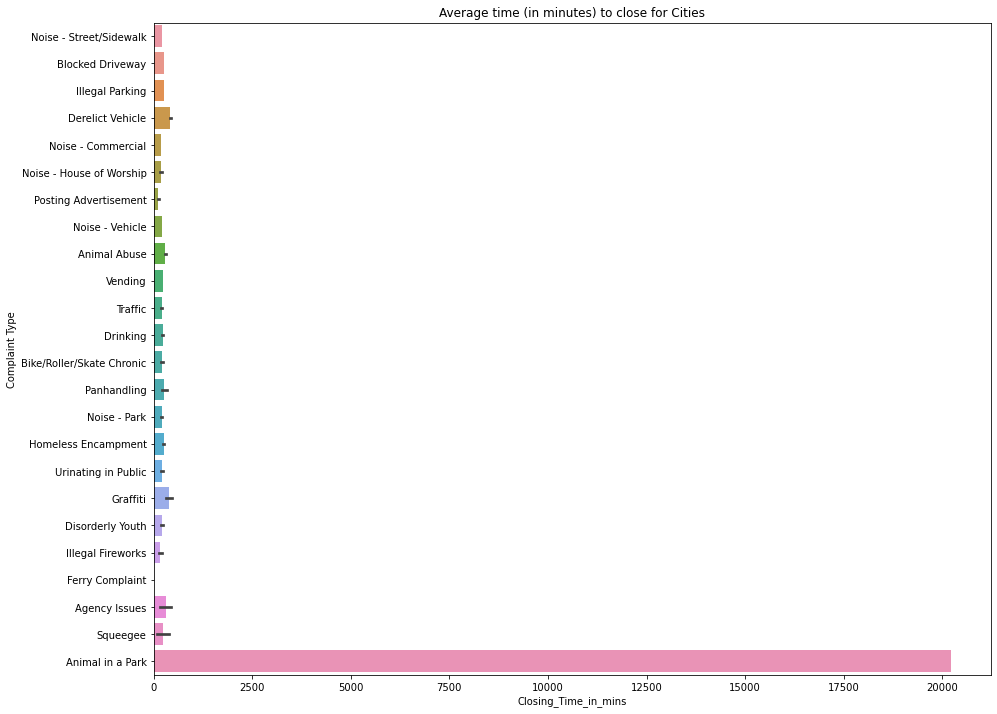

In [68]:
# Average resolving time of a compalaint by complain type
plt.figure(figsize=(15,12))
sns.barplot( y ='Complaint Type', x ='Closing_Time_in_mins', data=final_df)
plt.title('Average time (in minutes) to close for Cities')